In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
def figsize():
    plt.figure(figsize = (10,4))

In [3]:
def parser(s):
    return pd.to_datetime(s).strftime('%Y-%m-%d')

In [4]:
catfishSales = pd.read_csv('catfish.csv',parse_dates = [0],index_col = 0,date_parser = parser,squeeze = True)

C:\Users\91988\AppData\Local\Temp\ipykernel_16672\4121293094.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  catfishSales = pd.read_csv('catfish.csv',parse_dates = [0],index_col = 0,date_parser = parser,squeeze = True)


In [5]:
catfishSales = catfishSales.asfreq(pd.infer_freq(catfishSales.index))

In [6]:
startDate = datetime(2000,1,1)
endDate = datetime(2004,1,1)
limCatfishSales = catfishSales[startDate : endDate]

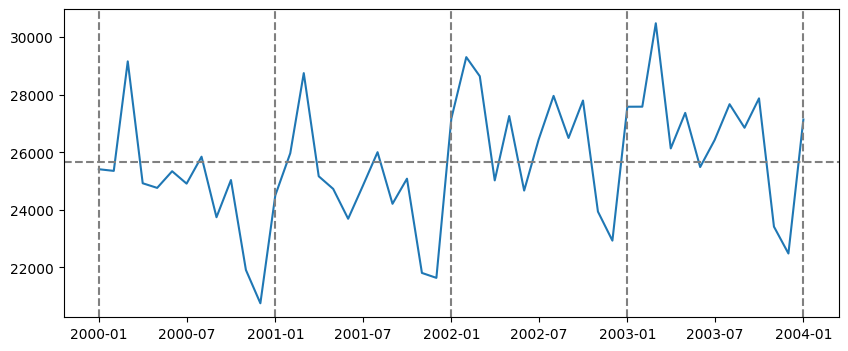

In [7]:
plt.figure(figsize = (10,4))
plt.plot(limCatfishSales)
plt.axhline(limCatfishSales.mean(),linestyle = "--",color = 'grey')
for year in range(2000,2005):
    plt.axvline(pd.to_datetime(f'{year}-01-01'),linestyle = '--',color = 'grey')

In [8]:
firstDiff = limCatfishSales.diff()[1:]

In [9]:
print(firstDiff)

Date
2000-02-01     -58.0
2000-03-01    3807.0
2000-04-01   -4237.0
2000-05-01    -161.0
2000-06-01     579.0
2000-07-01    -431.0
2000-08-01     936.0
2000-09-01   -2104.0
2000-10-01    1293.0
2000-11-01   -3125.0
2000-12-01   -1159.0
2001-01-01    3755.0
2001-02-01    1461.0
2001-03-01    2784.0
2001-04-01   -3585.0
2001-05-01    -439.0
2001-06-01   -1038.0
2001-07-01    1126.0
2001-08-01    1188.0
2001-09-01   -1794.0
2001-10-01     873.0
2001-11-01   -3276.0
2001-12-01    -172.0
2002-01-01    5538.0
2002-02-01    2135.0
2002-03-01    -663.0
2002-04-01   -3622.0
2002-05-01    2238.0
2002-06-01   -2591.0
2002-07-01    1771.0
2002-08-01    1520.0
2002-09-01   -1463.0
2002-10-01    1302.0
2002-11-01   -3861.0
2002-12-01   -1009.0
2003-01-01    4654.0
2003-02-01       2.0
2003-03-01    2899.0
2003-04-01   -4350.0
2003-05-01    1235.0
2003-06-01   -1883.0
2003-07-01     940.0
2003-08-01    1245.0
2003-09-01    -819.0
2003-10-01    1022.0
2003-11-01   -4459.0
2003-12-01    -934.0
2004-01-

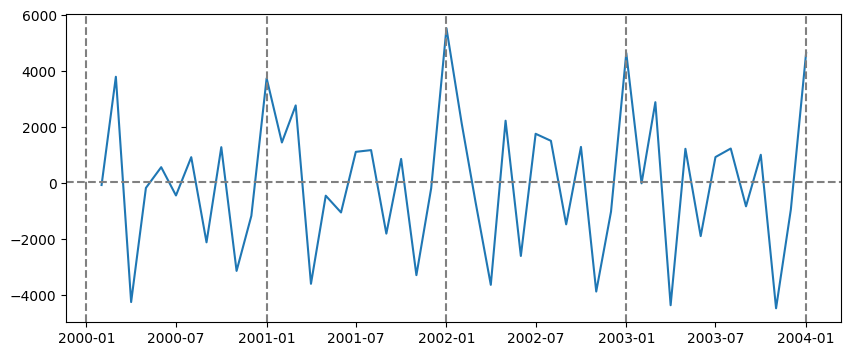

In [10]:
plt.figure(figsize = (10,4))
plt.plot(firstDiff)
plt.axhline(firstDiff.mean(),linestyle = "--",color = 'grey')
for year in range(2000,2005):
    plt.axvline(pd.to_datetime(f'{year}-01-01'),linestyle = '--',color = 'grey')

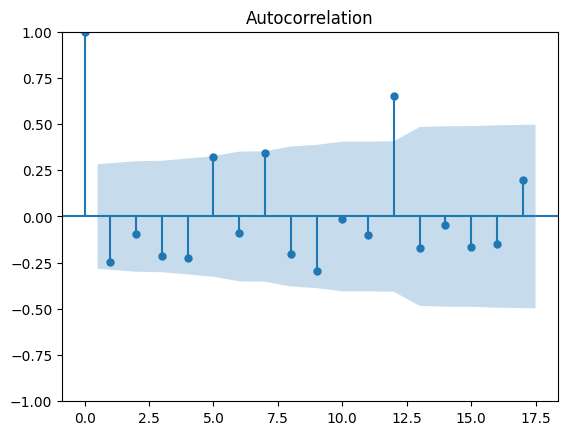

In [11]:
acfVals = plot_acf(firstDiff)

c:\Users\91988\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


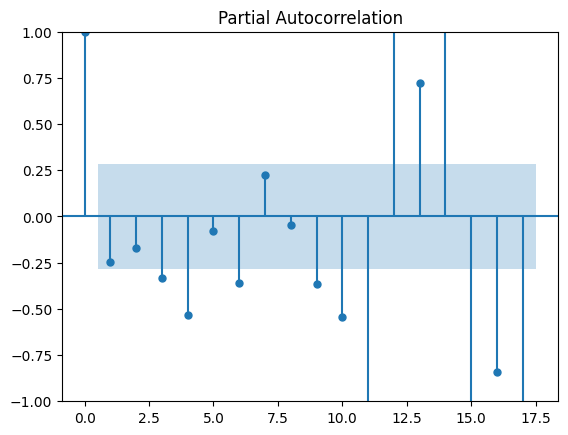

In [12]:
pacfVals = plot_pacf(firstDiff )

In [13]:
trainEnd = datetime(2003,7,1)
testEnd = datetime(2004,1,1)

trainData = firstDiff[:trainEnd]
testData = firstDiff[trainEnd + timedelta(days = 1):testEnd]

In [14]:
model = ARIMA(trainData,order = (4,0,1))

In [15]:
modelFit = model.fit()

In [16]:
print(modelFit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -376.598
Date:                Thu, 09 Mar 2023   AIC                            767.195
Time:                        14:41:49   BIC                            779.359
Sample:                    02-01-2000   HQIC                           771.654
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1795    179.935      0.134      0.893    -328.487     376.846
ar.L1         -0.8659      0.222     -3.896      0.000      -1.302      -0.430
ar.L2         -0.4234      0.246     -1.724      0.0

In [17]:
predStartDate = testData.index[0]
predEndDate = testData.index[-1]

In [18]:
predictions = modelFit.predict(start = predStartDate,end = predEndDate)
residuals = testData - predictions

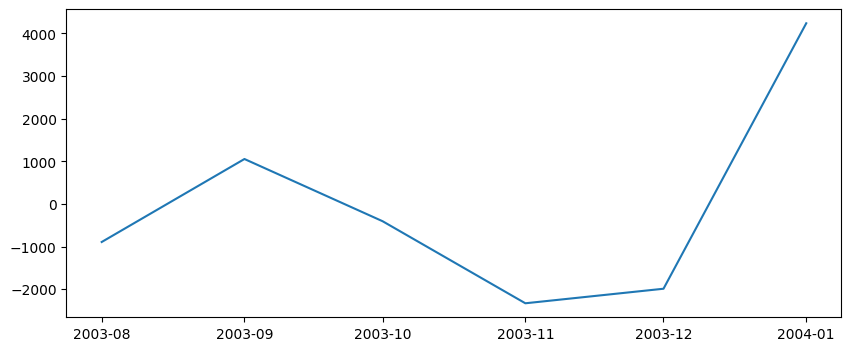

In [19]:
plt.figure(figsize = (10,4))
plt.plot(residuals)

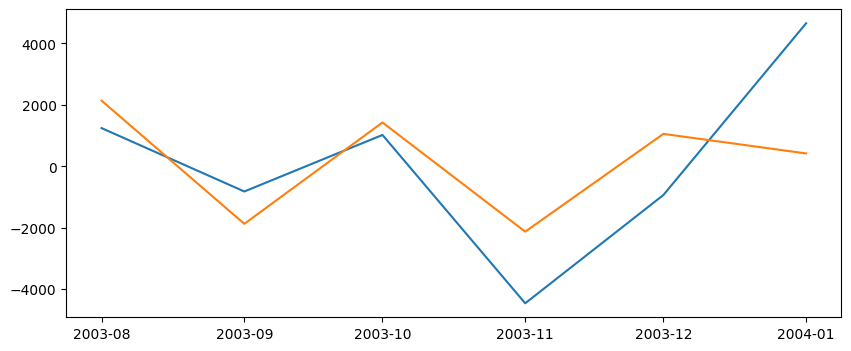

In [20]:
plt.figure(figsize = (10,4))
plt.plot(testData)
plt.plot(predictions)

In [21]:
print("RMSE : ",np.sqrt(np.mean(residuals**2)))

RMSE :  2214.6996932969023


In [22]:
newModel = ARIMA(trainData,order = (4,1,1))

In [23]:
newModelFit = newModel.fit()

c:\Users\91988\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
print(newModelFit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -370.888
Date:                Thu, 09 Mar 2023   AIC                            753.776
Time:                        14:41:50   BIC                            764.058
Sample:                    02-01-2000   HQIC                           757.520
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5044      0.137     -3.683      0.000      -0.773      -0.236
ar.L2         -0.3096      0.157     -1.977      0.048      -0.617      -0.003
ar.L3         -0.4701      0.217     -2.165      0.0

In [25]:
newPredicitons = newModelFit.predict(start = predStartDate,end = predEndDate)

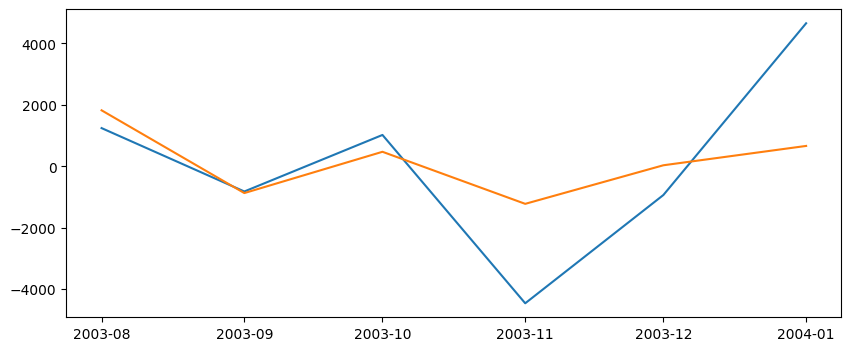

In [26]:
plt.figure(figsize = (10,4))
plt.plot(testData)
plt.plot(newPredicitons)

In [27]:
newResiduals = testData - newPredicitons

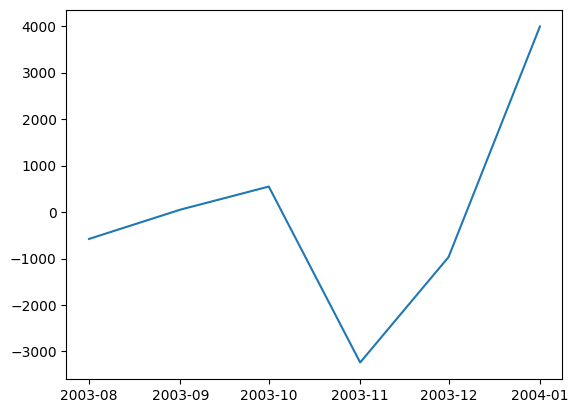

In [28]:
plt.plot(newResiduals)

In [29]:
print("RMSE : ",np.sqrt(np.mean(newResiduals**2)))

RMSE :  2160.586232397018


In [30]:
rollingPredections = pd.Series()
for endDate in testData.index:
    newTrainD = trainData[: endDate]
    newMod = ARIMA(newTrainD,order = (4,1,1))
    newModFit = newMod.fit()
    pred = newModFit.predict(endDate)
    rollingPredections[endDate] = pred

C:\Users\91988\AppData\Local\Temp\ipykernel_16672\3231650127.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rollingPredections = pd.Series()
c:\Users\91988\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\91988\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\91988\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

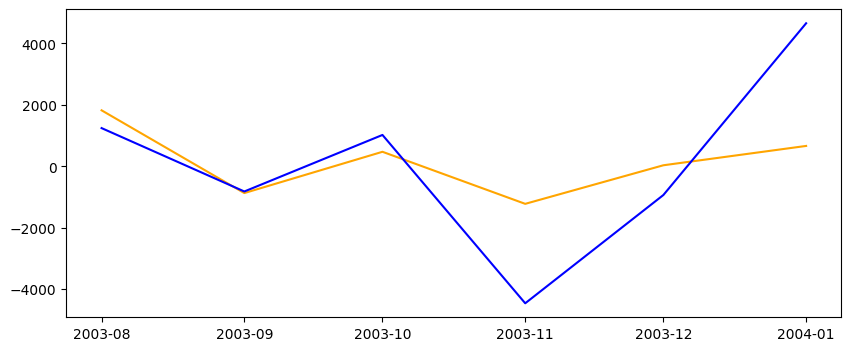

In [31]:
plt.figure(figsize = (10,4))
plt.plot(rollingPredections,color = 'orange')
plt.plot(testData,color = 'blue')

In [32]:
rollingResiduals = testData - rollingPredections

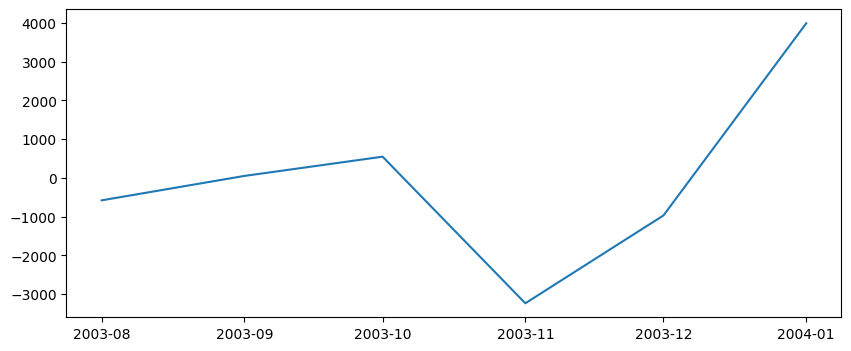

In [33]:
figsize()
plt.plot(rollingResiduals)

In [34]:
# print('RMSE : ', np.sqrt(np.mean(rollingResiduals**2)))
print('RMSE : ',np.sqrt(np.mean((rollingResiduals**2).apply(lambda x:float(x)))))


RMSE :  2160.586232397018
